In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/Historical_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23880 entries, 0 to 23879
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 23880 non-null  object 
 1   customer_age                23403 non-null  float64
 2   job_type                    23880 non-null  object 
 3   marital                     23773 non-null  object 
 4   education                   23880 non-null  object 
 5   default                     23880 non-null  object 
 6   balance                     23603 non-null  float64
 7   housing_loan                23880 non-null  object 
 8   personal_loan               23767 non-null  object 
 9   communication_type          23880 non-null  object 
 10  day_of_month                23880 non-null  int64  
 11  month                       23880 non-null  object 
 12  last_contact_duration       23880 non-null  int64  
 13  num_contacts_in_campaign    237

In [ ]:
df.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0


In [ ]:
df.columns

Index(['customer_id', 'customer_age', 'job_type', 'marital', 'education',
       'default', 'balance', 'housing_loan', 'personal_loan',
       'communication_type', 'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome', 'term_deposit_subscribed'],
      dtype='object')

In [ ]:
categorical_col=df.select_dtypes(include=['object']).columns
categorical_col

Index(['customer_id', 'job_type', 'marital', 'education', 'default',
       'housing_loan', 'personal_loan', 'communication_type', 'month',
       'prev_campaign_outcome'],
      dtype='object')

In [ ]:
numerical_col=df.select_dtypes(include=['float64','int64']).columns
numerical_col

Index(['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'term_deposit_subscribed'],
      dtype='object')

In [ ]:
df.isna().sum()

customer_id                     0
customer_age                  477
job_type                        0
marital                       107
education                       0
default                         0
balance                       277
housing_loan                    0
personal_loan                 113
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       96
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [ ]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_Data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_Data

,Total,Percent
customer_age,477,1.997487
balance,277,1.159966
personal_loan,113,0.473199
marital,107,0.448074
num_contacts_in_campaign,96,0.402010
day_of_month,0,0.000000
prev_campaign_outcome,0,0.000000
num_contacts_prev_campaign,0,0.000000
last_contact_duration,0,0.000000
month,0,0.000000


In [ ]:
for col in categorical_col:
  print(df[col].value_counts(),"\n")

id_32289    1
id_42421    1
id_13447    1
id_43305    1
id_3525     1
           ..
id_7426     1
id_20929    1
id_1997     1
id_19870    1
id_1723     1
Name: customer_id, Length: 23880, dtype: int64 

blue-collar      5167
management       5006
technician       3978
admin.           2717
services         2224
retired          1176
self-employed     845
entrepreneur      773
unemployed        675
housemaid         663
student           502
unknown           154
Name: job_type, dtype: int64 

married     14271
single       6707
divorced     2795
Name: marital, dtype: int64 

secondary    12330
tertiary      6993
primary       3571
unknown        986
Name: education, dtype: int64 

no     23452
yes      428
Name: default, dtype: int64 

yes    13369
no     10511
Name: housing_loan, dtype: int64 

no     20001
yes     3766
Name: personal_loan, dtype: int64 

cellular     15486
unknown       6892
telephone     1502
Name: communication_type, dtype: int64 

may    7331
jul    3615
aug    32

In [ ]:
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
count,23403.000000,23603.000000,23880.000000,23880.000000,23784.000000,23880.000000,23880.000000
mean,40.394821,1363.966106,15.796315,854.879648,2.775353,0.583836,0.106198
std,10.753045,3019.583085,8.321136,74.537616,3.148117,2.624465,0.308097
min,18.000000,-8020.000000,1.000000,661.000000,1.000000,0.000000,0.000000
25%,32.000000,71.000000,8.000000,809.000000,1.000000,0.000000,0.000000
50%,38.000000,443.000000,16.000000,871.000000,2.000000,0.000000,0.000000
75%,48.000000,1410.500000,21.000000,897.000000,3.000000,0.000000,0.000000
max,93.000000,98419.000000,31.000000,1019.000000,63.000000,275.000000,1.000000


In [ ]:
df.corr()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
customer_age,1.000000,0.106850,-0.014534,-0.091451,0.008338,-0.004242,0.032112
balance,0.106850,1.000000,0.004370,-0.096978,-0.018266,0.011218,0.052946
day_of_month,-0.014534,0.004370,1.000000,-0.208932,0.164829,-0.044913,-0.024477
last_contact_duration,-0.091451,-0.096978,-0.208932,1.000000,-0.068436,0.037976,-0.019215
num_contacts_in_campaign,0.008338,-0.018266,0.164829,-0.068436,1.000000,-0.029736,-0.071203
num_contacts_prev_campaign,-0.004242,0.011218,-0.044913,0.037976,-0.029736,1.000000,0.084544
term_deposit_subscribed,0.032112,0.052946,-0.024477,-0.019215,-0.071203,0.084544,1.000000


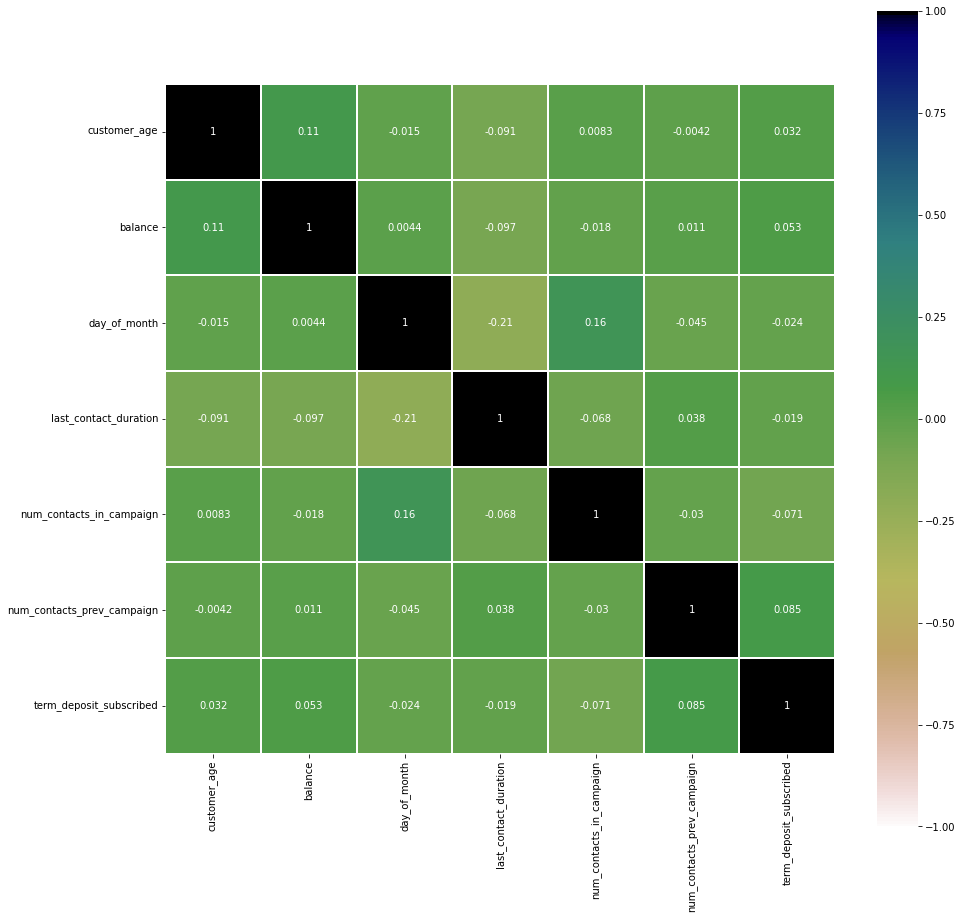

In [ ]:
plt.figure(figsize=[15, 15])
sns.heatmap(data=df.corr(), vmin=-1, vmax=1, cmap='gist_earth_r', annot=True, square=True, linewidths=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


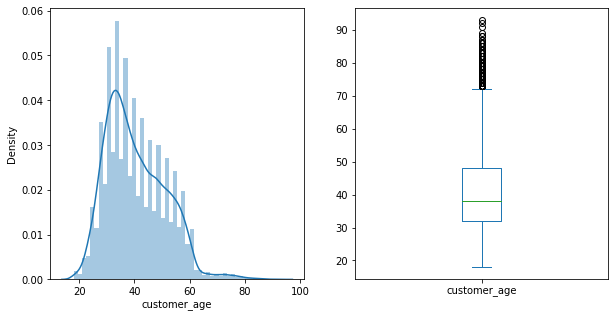

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


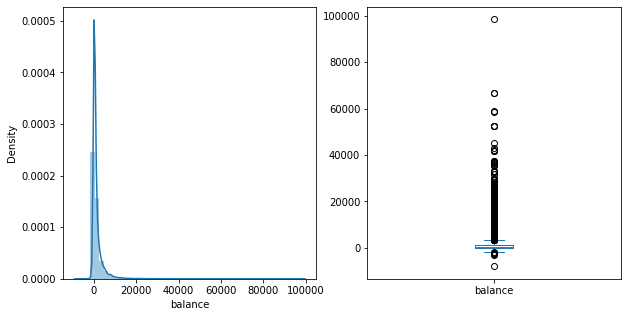

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


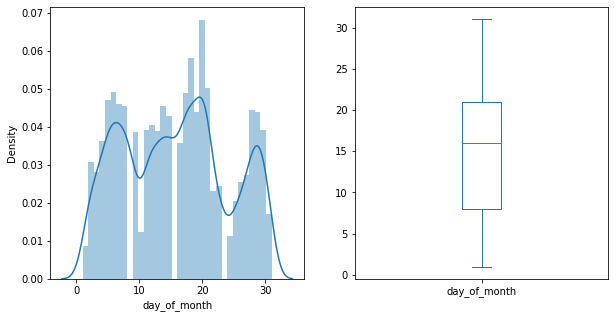

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


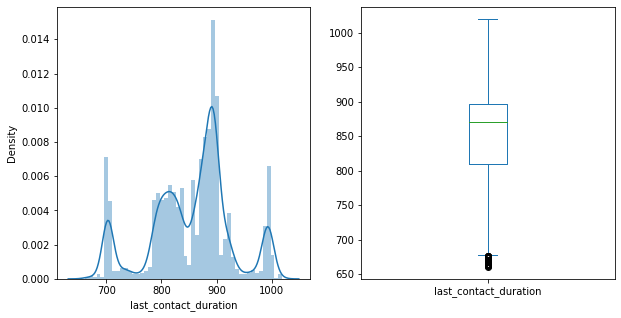

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


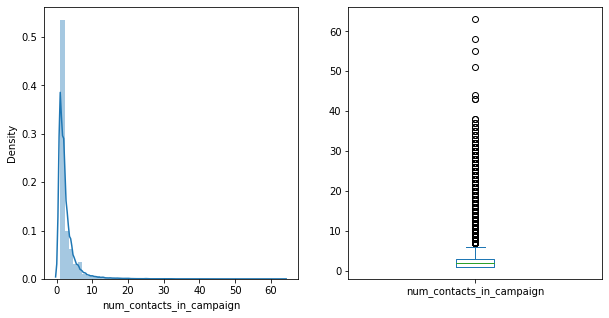

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


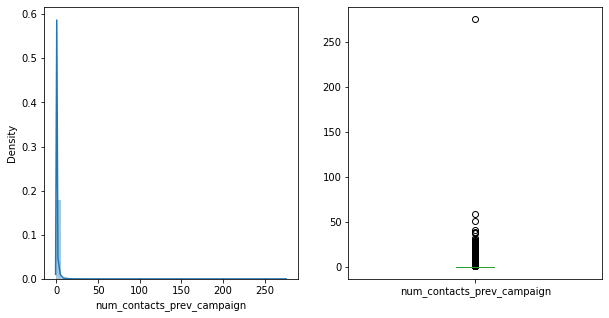

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


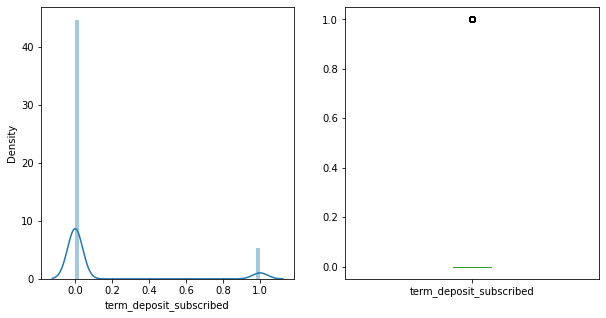

In [ ]:
for i in range(len(numerical_col)): 
  plt.figure(1)
  plt.subplot(121)
  sns.distplot(df[numerical_col[i]]);
  plt.subplot(122)
  df[numerical_col[i]].plot.box(figsize=(10,5)) 
  plt.show()

In [ ]:


'''    
for col in categorical_col:
    plt.figure(figsize=(5,5)) 
    sns.countplot(df[col])
    plt.show()'''

'    \nfor col in categorical_col:\n    plt.figure(figsize=(5,5)) \n    sns.countplot(df[col])\n    plt.show()'

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


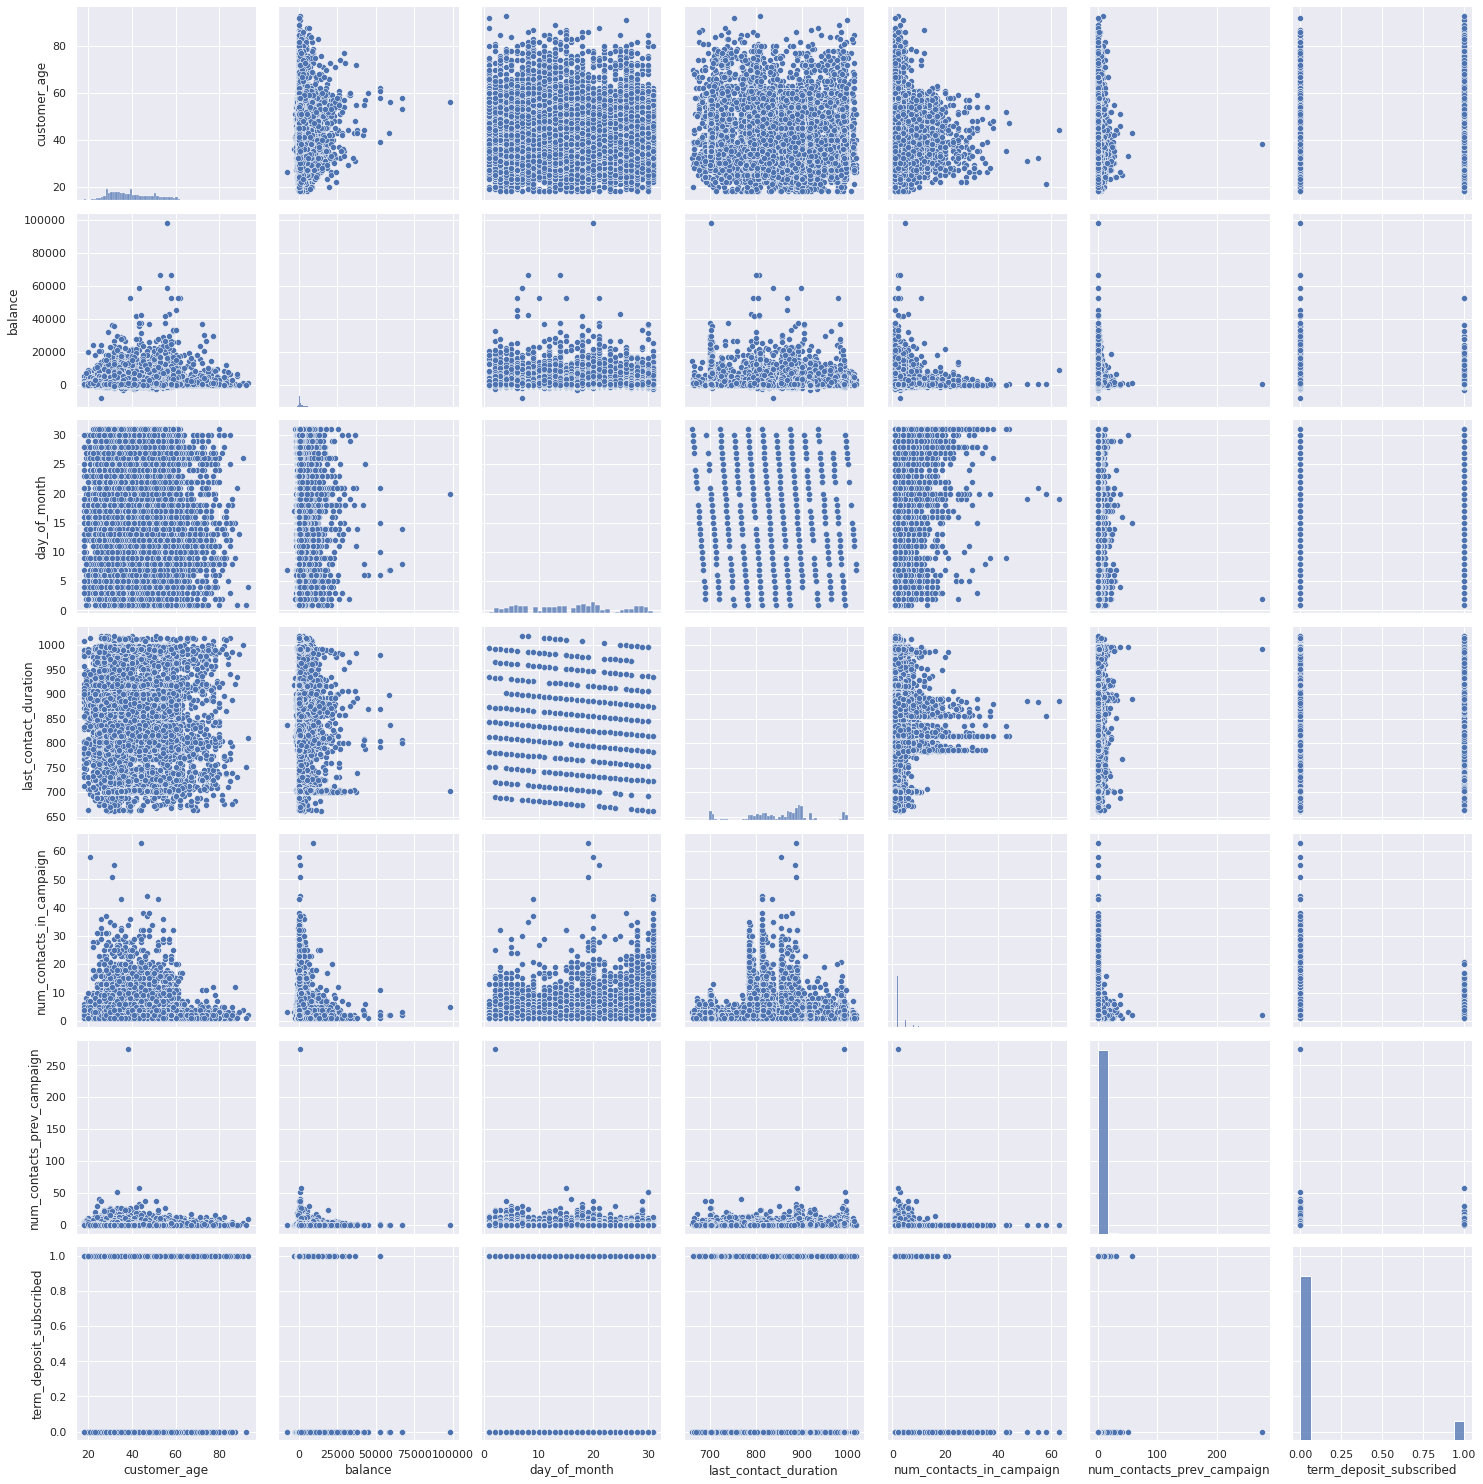

In [ ]:
sns.set()
cols = ['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'term_deposit_subscribed']
sns.pairplot(df[cols], size = 3)
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)
0    21344
1     2536
Name: term_deposit_subscribed, dtype: int64
0    0.893802
1    0.106198
Name: term_deposit_subscribed, dtype: float64


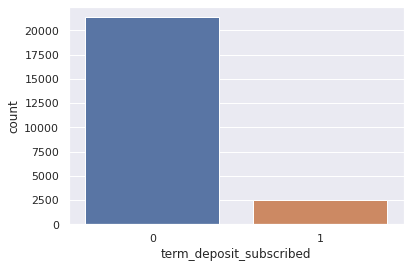

In [ ]:
print(sns.countplot(df['term_deposit_subscribed']))
print(df['term_deposit_subscribed'].value_counts())
print(df['term_deposit_subscribed'].value_counts()/len(df['term_deposit_subscribed']))


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23880 entries, 0 to 23879
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 23880 non-null  object 
 1   customer_age                23403 non-null  float64
 2   job_type                    23880 non-null  object 
 3   marital                     23773 non-null  object 
 4   education                   23880 non-null  object 
 5   default                     23880 non-null  object 
 6   balance                     23603 non-null  float64
 7   housing_loan                23880 non-null  object 
 8   personal_loan               23767 non-null  object 
 9   communication_type          23880 non-null  object 
 10  day_of_month                23880 non-null  int64  
 11  month                       23880 non-null  object 
 12  last_contact_duration       23880 non-null  int64  
 13  num_contacts_in_campaign    237

"g.ax.set_ylim(0,100)\n\n\nfor p in g.ax.patches:\n  txt=str(p.get_height().round(2))+'%'\n  txt_x=p.get_x()\n  txt_y=p.get_height()\n  g.ax.text(txt_x,txt_y,txt)\n"

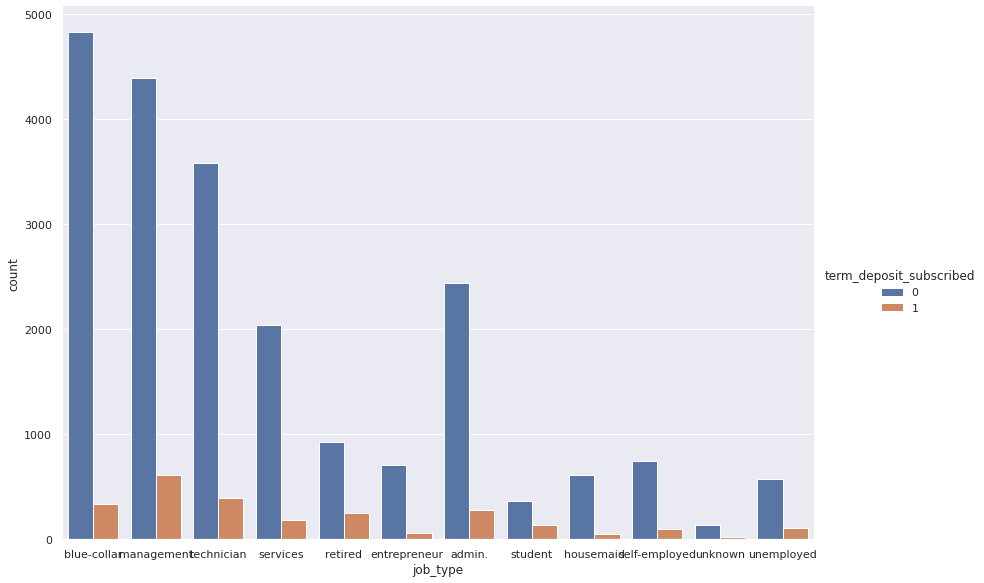

In [ ]:
from matplotlib import rcParams

g=sns.catplot(x='job_type',hue='term_deposit_subscribed', data=df, kind="count",height=8.27,aspect=11.7/8.27)
'''g.ax.set_ylim(0,100)


for p in g.ax.patches:
  txt=str(p.get_height().round(2))+'%'
  txt_x=p.get_x()
  txt_y=p.get_height()
  g.ax.text(txt_x,txt_y,txt)
'''

In [ ]:
missing_value_columns=['customer_age','balance','personal_loan','marital','num_contacts_in_campaign']

In [ ]:
df['customer_age']=df['customer_age'].fillna(df['customer_age'].mode()[0])
df['balance']=df['balance'].fillna(df['balance'].mean())
df['personal_loan']=df['personal_loan'].fillna(df['personal_loan'].mode()[0])
df['marital']=df['marital'].fillna(df['marital'].mode()[0])
df['num_contacts_in_campaign']=df['num_contacts_in_campaign'].fillna(df['num_contacts_in_campaign'].mean())

In [ ]:
df.isna().sum()

customer_id                   0
customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
term_deposit_subscribed       0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in categorical_col:
  df[col]=labelencoder.fit_transform(df[col])
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23880 entries, 0 to 23879
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 23880 non-null  int64  
 1   customer_age                23880 non-null  float64
 2   job_type                    23880 non-null  int64  
 3   marital                     23880 non-null  int64  
 4   education                   23880 non-null  int64  
 5   default                     23880 non-null  int64  
 6   balance                     23880 non-null  float64
 7   housing_loan                23880 non-null  int64  
 8   personal_loan               23880 non-null  int64  
 9   communication_type          23880 non-null  int64  
 10  day_of_month                23880 non-null  int64  
 11  month                       23880 non-null  int64  
 12  last_contact_duration       23880 non-null  int64  
 13  num_contacts_in_campaign    238

In [ ]:
df.corr()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
customer_id,1.000000,-0.014436,-0.003797,0.009339,0.000983,0.004712,-0.011037,0.003512,0.001902,0.010929,0.001448,0.009537,0.005816,0.011272,-0.002731,0.011847,0.005808
customer_age,-0.014436,1.000000,-0.019678,-0.392211,-0.096298,-0.020220,0.105866,-0.183183,-0.016315,0.021245,-0.014368,-0.043759,-0.090574,0.007390,-0.003991,0.014719,0.031996
job_type,-0.003797,-0.019678,1.000000,0.062669,0.165938,-0.003104,0.010750,-0.129600,-0.029025,-0.073972,0.023604,-0.086313,-0.048696,0.009024,-0.003343,0.009245,0.047875
marital,0.009339,-0.392211,0.062669,1.000000,0.110061,-0.011977,-0.004505,-0.013446,-0.052802,-0.031910,0.000296,-0.005115,0.042593,-0.003277,0.015246,-0.015424,0.046535
education,0.000983,-0.096298,0.165938,0.110061,1.000000,-0.008748,0.062197,-0.092136,-0.054162,-0.110112,0.023940,-0.054280,-0.055235,0.005756,0.020059,-0.026715,0.064348
default,0.004712,-0.020220,-0.003104,-0.011977,-0.008748,1.000000,-0.066524,-0.006748,0.074047,0.013709,0.008921,0.006372,-0.020189,0.011199,-0.020191,0.035931,-0.018905
balance,-0.011037,0.105866,0.010750,-0.004505,0.062197,-0.066524,1.000000,-0.072046,-0.083611,-0.028970,0.004343,0.018412,-0.096397,-0.018092,0.011196,-0.023283,0.052716
housing_loan,0.003512,-0.183183,-0.129600,-0.013446,-0.092136,-0.006748,-0.072046,1.000000,0.037876,0.188801,-0.020245,0.270369,0.178056,-0.026238,0.040395,-0.102555,-0.141493
personal_loan,0.001902,-0.016315,-0.029025,-0.052802,-0.054162,0.074047,-0.083611,0.037876,1.000000,-0.018498,0.016129,0.024471,-0.029826,0.002795,-0.010495,0.018236,-0.068225
communication_type,0.010929,0.021245,-0.073972,-0.031910,-0.110112,0.013709,-0.028970,0.188801,-0.018498,1.000000,-0.023926,0.356989,0.176612,0.022005,-0.132165,0.275105,-0.147065


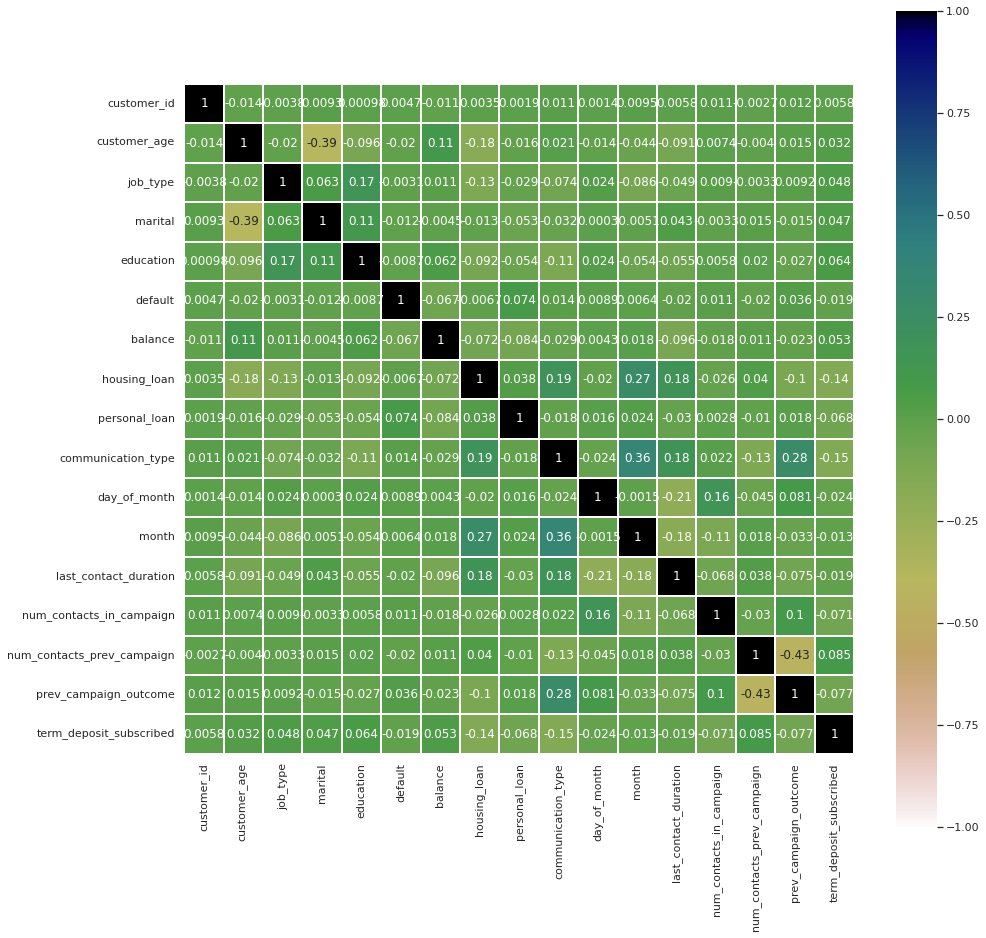

In [ ]:
plt.figure(figsize=[15, 15])
sns.heatmap(data=df.corr(), vmin=-1, vmax=1, cmap='gist_earth_r', annot=True, square=True, linewidths=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler


In [ ]:
Y=df['term_deposit_subscribed']
Y=pd.DataFrame(Y)

X=df.drop(['term_deposit_subscribed'],axis=1)
X=pd.DataFrame(X)

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

y_pred1 = lr.predict_proba(X_test)
y_pred1=pd.DataFrame(y_pred1)
y_pred=lr.predict(X_test)
y_pred=pd.DataFrame(y_pred)
print(y_pred)
print(y_pred1)


print("Accuracy Score :",(accuracy_score(Y_test,y_pred)),"\n")
print("Confusion Matrix :","\n",(confusion_matrix(Y_test, y_pred)))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
7159  0
7160  0
7161  0
7162  0
7163  0

[7164 rows x 1 columns]
             0         1
0     0.918919  0.081081
1     0.922117  0.077883
2     0.922372  0.077628
3     0.923229  0.076771
4     0.944431  0.055569
...        ...       ...
7159  0.924123  0.075877
7160  0.888125  0.111875
7161  0.916124  0.083876
7162  0.854462  0.145538
7163  0.912951  0.087049

[7164 rows x 2 columns]
Accuracy Score : 0.8880513679508655 

Confusion Matrix : 
 [[6361   11]
 [ 791    1]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#!pip install statsmodel
import statsmodels.api as sm
logm1 = sm.GLM((Y_train,X_train), family = sm.families.Binomial())
logm1.fit().summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


TypeError: ignored